# Categorización de animales

1. Instalar = 'pip install torch torchvision matplotlib'

# 📌 ¿Qué hace este código?
Carga imágenes reales de CIFAR-10.

1. Filtra clases como "cat" y "dog" (vienen por defecto).

2. Crea una red neuronal simple.

3. Usa loss.backward() para aplicar backpropagation.

4. Muestra imágenes y etiquetas reales.

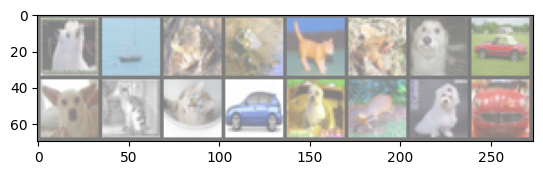

dog   ship  frog  frog  cat   frog  dog   automobile dog   cat   cat   automobile dog   deer  dog   automobile
[Epoch 1, Batch 1000] Loss: 2.022
[Epoch 1, Batch 2000] Loss: 1.908
[Epoch 1, Batch 3000] Loss: 1.866
[Epoch 2, Batch 1000] Loss: 1.831
[Epoch 2, Batch 2000] Loss: 1.814
[Epoch 2, Batch 3000] Loss: 1.800
✅ Entrenamiento terminado


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

# 1. Transformar las imágenes: redimensionar y convertir a tensor
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

# 2. Cargar el dataset de perros y gatos (usaremos CIFAR-10 que incluye ambos)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)

# Mapeo de clases
classes = trainset.classes  # ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 3. Visualizar algunas imágenes
def imshow(img):
    img = img / 2 + 0.5  # desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Mostrar un lote aleatorio
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(16)))

# 4. Definir la red neuronal
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # CIFAR-10 tiene 10 clases

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # aplanar la imagen
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# 5. Definir la función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# 6. Entrenamiento (aplica automáticamente backpropagation)
for epoch in range(2):  # solo 2 ciclos para el ejemplo
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # 1. Resetear los gradientes
        optimizer.zero_grad()

        # 2. Forward pass
        outputs = net(inputs)

        # 3. Calcular el error (loss)
        loss = criterion(outputs, labels)

        # 4. Backward pass (retropropagación)
        loss.backward()

        # 5. Actualizar los pesos
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # imprimir cada 1000 lotes
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 1000:.3f}')
            running_loss = 0.0

print('✅ Entrenamiento terminado')
